## Data Analysis and Survival Prediction of the Kaggle Titanic Dataset

Machine learning problem: Classification <br>
Output variable: Survived

### Import all libraries

In [3]:
import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))

import seaborn as sns
print("seaborn version: {}".format(sns.__version__))

pd.options.mode.chained_assignment = None

pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### Load the Training and Test Dataset

In [5]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")
test_ids = df_test["PassengerId"]

### First look at the training and test dataset

In [7]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### Create a statistical report of numeric and categorical features

In [10]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


### Report:
1. There are 891 rows in the traning dataset and 418 rows in the testing dataset based on the PassengerId
2. In both the traning dataset and the testing dataset the age column has missing values (We will handle later).
3. The mean of "Survived" in the training data is 0.38 which can be interpreted as 38% of passengers survived.
4. The minimun fare is 0 so we need to check if children had to pay and what age is classified as children
5. The test dataset has 1 missing fare value



In [13]:
df_train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Key questions for the Data Analysis

In [15]:
def pivot_survival_rate(df_train, target_column):
    #Create a pivot table with the target column as index, "Survived" as columns
    #Count the number of entries of "PassengerID" for each combination of target_column and "Survived"
    #fill all empty cells with 0
    df_pivot = pd.pivot_table(df_train[["PassengerId", target_column, "Survived"]] ,index = target_column, columns = "Survived", aggfunc = "count", fill_value = 0).reset_index()
    df_pivot.columns = [target_column, "Not survived", "Survived"]
    df_pivot["passengers"] = df_pivot['Not survived'] + df_pivot['Survived']
    df_pivot['survival_rate'] = (df_pivot['Survived'] / df_pivot['passengers']) * 100
    return df_pivot

#### Had Older Passengers and Children have a Higher Chance of Survival?
Create a basic univariate distribution plot of "Age" in the training data to find the threshold values when the survival rate is changing. Based on this threshold, we will create a new feature that categorizes the age feature (children, adult, senior). Based on the number of survived passengers, we then can calculate the survival rate for each age category.

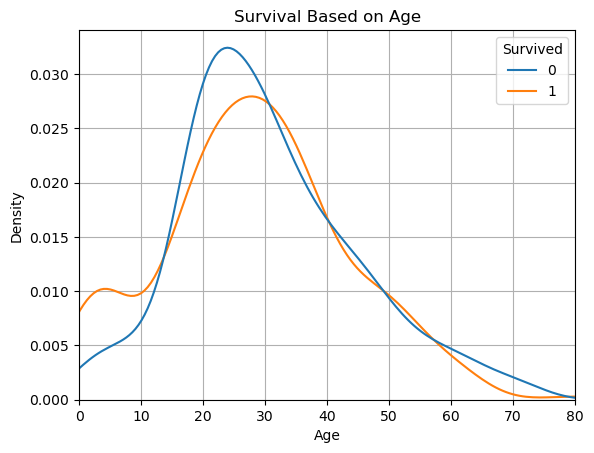

In [17]:
sns.kdeplot(data = df_train, x = "Age", hue = "Survived", common_norm = False)

#Limit the x-axis to the max age
plt.xlim(0, df_train["Age"].max())

plt.title("Survival Based on Age")
plt.grid()
plt.show()

#### From the distribution plot we can say that for ages below 12 the chances of survival is very high
#### If the passenger is above 60 years old then the survival rate decreases very fast

In [19]:
def age_category(row):
    if row < 12:
        return "children"
    elif (row>=12) and (row<60):
        return "adult"
    elif row >=60:
        return "senior"
    else:
        return "no age"

df_train["Age_category"] = df_train["Age"].apply(lambda row: age_category(row))
df_test["Age_category"] = df_test["Age"].apply(lambda row: age_category(row))

In [20]:
#Show the survival; rate based on the age category
pivot_survival_rate(df_train, "Age_category").sort_values(by = 'survival_rate', ascending = False)

,Age_category,Not survived,Survived,passengers,survival_rate
1,children,29,39,68,57.352941
0,adult,376,244,620,39.354839
2,no age,125,52,177,29.378531
3,senior,19,7,26,26.923077


#### Results
1. Children under 12 years old have a highest survival rate of around 57%
2. Seniors above the age of 60 have the lowest survival rate of around 27%

### Did Passengers with a Higher Pclass have a Higher Chance of Survival?

In [23]:
pivot_survival_rate(df_train, "Pclass")

,Pclass,Not survived,Survived,passengers,survival_rate
0,1,80,136,216,62.962963
1,2,97,87,184,47.282609
2,3,372,119,491,24.236253


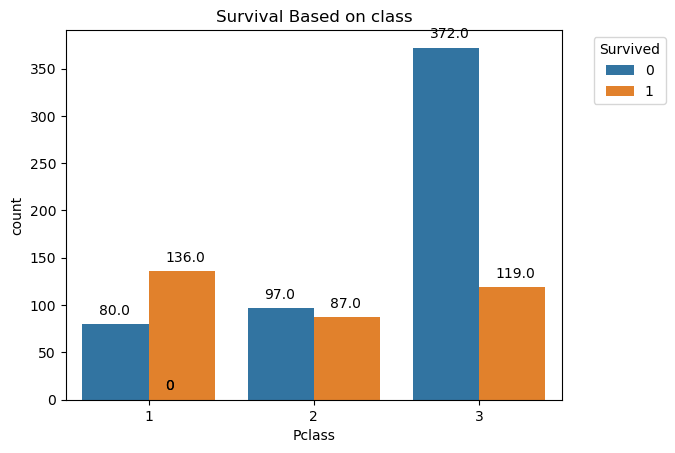

In [24]:
#Create a count plot that counts the survived and not survived passengers for each passenger class
ax = sns.countplot(data = df_train, x='Pclass', hue='Survived')

#Show numbers above the bars
for p in ax.patches:
    ax.annotate("{}".format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

#SHow the lengend outside of the plot
ax.legend(title = "Survived", bbox_to_anchor = (1.05,1),loc = "upper left")
plt.title("Survival Based on class")
plt.show()

From this we can see that the passengers in first class have the highest survival rate while passengers in third class have the lowest survival rate

### Did Passengers that Paid a Higher Fare also had a Higher Survival Rate?

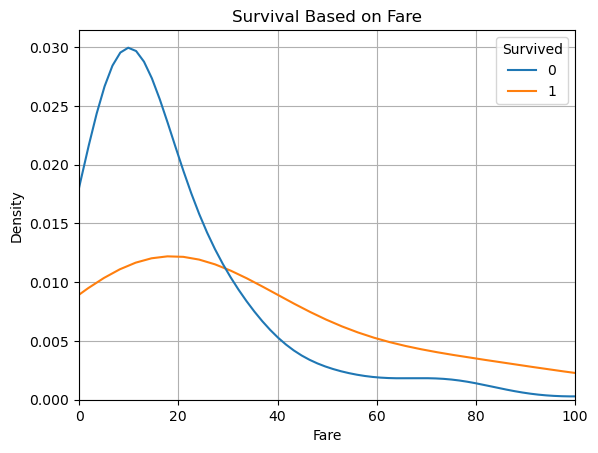

In [27]:
#Create univariate distribution plot for "Fare" seperated by "Survived"
#Well set common_norm = False
sns.kdeplot(data = df_train, x = "Fare", hue = "Survived", common_norm = False)
plt.grid()
plt.xlim(0,100)
plt.title("Survival Based on Fare")
plt.show()

In [28]:
pivot_survival_rate(df_train, "Fare")

,Fare,Not survived,Survived,passengers,survival_rate
0,0.0000,14,1,15,6.666667
1,4.0125,1,0,1,0.000000
2,5.0000,1,0,1,0.000000
3,6.2375,1,0,1,0.000000
4,6.4375,1,0,1,0.000000
...,...,...,...,...,...
243,227.5250,1,3,4,75.000000
244,247.5208,1,1,2,50.000000
245,262.3750,0,2,2,100.000000
246,263.0000,2,2,4,50.000000


#### Results 
- People who paid less than 30 had a lower survival rate than people who paid over 30


### Did Women Have a Higher Chance of Survival

In [31]:
pivot_survival_rate(df_train, "Sex")

,Sex,Not survived,Survived,passengers,survival_rate
0,female,81,233,314,74.203822
1,male,468,109,577,18.890815


#### Results:
- Indeed women did have a significantly higher survival rate of around 74% while men only have around 19%

## Try to seperate Survived and not Survived Passengers
In addition to the key questions, we need to figure out if one or a combination of features are able to seperate the survived and not survived passengers.

### Survival Rate for Sex and Pclass
During the data analysis process we saw that the Sex and the Pclass had a significant influence on the survival rate. Therefore we would like to see the combined influence of them both on the rate of survival for the passengers.
- Use catplot for categorical and numerical features
- Use bar_label to show the numbers for each bar

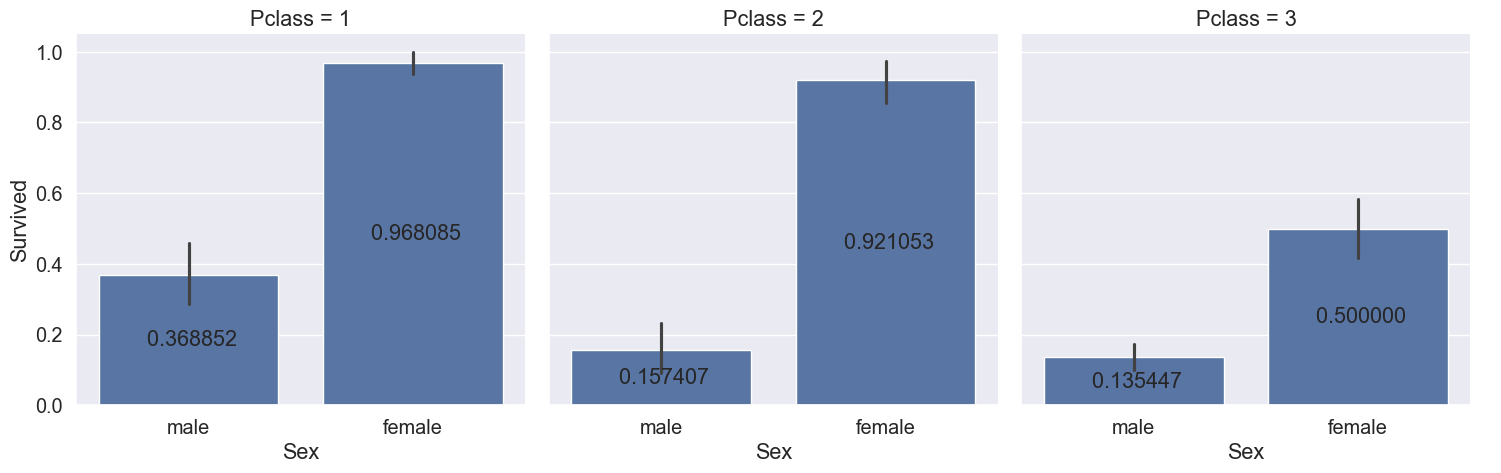

In [35]:
sns.set(font_scale = 1.3)
g = sns.catplot(x = "Sex", y = "Survived", col = "Pclass", data = df_train, kind = "bar")

for i in range(3):
    ax = g.facet_axis(0,i)

    for c in ax.containers:
        labels = [f'{(v.get_height()): 2f}' for v in c]
        ax.bar_label(c, labels = labels, label_type = "center")
plt.show()

#### Results:
- Overall females had a higher rate of survival than males in all 3 passenger classes
- We also notice that both males and females in the higher passenger classes had a higher survival rate

## Cleaning Data

In [38]:
df_train.head()
# df_train.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


In [39]:
def clean(data):
    #First of all drop any features we think that are not useful and ones that we created earlier
    data = data.drop(["Ticket", "Cabin", "Name", "PassengerId", "Age_category"], axis = 1)
    
    cols = ["SibSp","Parch","Fare","Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace = True)
    data["Embarked"].fillna("U", inplace = True)
    return data
data = clean(df_train)
test = clean(df_test)

C:\Users\Giang\AppData\Local\Temp\ipykernel_23580\2823613843.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace = True)
C:\Users\Giang\AppData\Local\Temp\ipykernel_23580\2823613843.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [40]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ["Sex", "Embarked"]
for col in cols:
    data[col] = le.fit_transform(data[col])
    test[col] = le.transform(test[col])
    print(le.classes_)
data.head()

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = data["Survived"]
X = data.drop("Survived", axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state=42)

In [43]:
clf = LogisticRegression(random_state = 0, max_iter= 1000).fit(X_train, y_train)

In [44]:
predictions = clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, predictions)

0.8100558659217877

In [45]:
submission_preds = clf.predict(test)

In [46]:
df = pd.DataFrame({"PassengerId": test_ids.values, "Survived":submission_preds})

In [47]:
df.to_csv("submission.csv", index = False)